<a href="https://colab.research.google.com/github/SithmiDesilva/Customer_Feedback_Analysis/blob/main/Customer_Feedback_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the dependencies
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import hstack
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter



# **1. Load and Explore the Dataset**

In [ ]:
#Download necessary libraries
nltk.download('stopwords') # Downloads the stopwords dataset from NLTK
nltk.download('wordnet')  # Downloads the WordNet dataset from NLTK
nltk.download('vader_lexicon')  # Downloads the VADER lexicon for sentiment analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
print(stopwords.words('english') )

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
#Load the dataset
data=pd.read_csv('/content/drive/MyDrive/Circles_Assignment/problem_2/customer_support_tickets.csv')

In [ ]:
# Shape of the dataset
data.shape

(8469, 17)

In [ ]:
# Explore the dataset
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,6/1/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,6/1/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,6/1/2023 11:14,6/1/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,6/1/2023 7:29,6/1/2023 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,6/1/2023 0:12,6/1/2023 19:53,1.0


In [ ]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
# Check the null values
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
#Check the imbalance of Customer Satisfaction Rating column
data['Customer Satisfaction Rating'].value_counts()

,count
Customer Satisfaction Rating,
3.0,580
1.0,553
2.0,549
5.0,544
4.0,543


# **2. Exploraitory Data Analysis**

In [ ]:
numerical_features=data.select_dtypes(include=['int64','float64']).columns
categorical_features=data.select_dtypes(include=['object']).columns

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n {unique_values}")
    print('\n')

Unique values in column 'Ticket ID':
 [   1    2    3 ... 8467 8468 8469]


Unique values in column 'Customer Name':
 ['Marisa Obrien' 'Jessica Rios' 'Christopher Robbins' ... 'Brandon Walsh'
 'Michelle Kelley' 'Steven Davis MD']


Unique values in column 'Customer Email':
 ['carrollallison@example.com' 'clarkeashley@example.com'
 'gonzalestracy@example.com' ... 'ashley83@example.org'
 'fpowell@example.org' 'lori20@example.net']


Unique values in column 'Customer Age':
 [32 42 48 27 67 53 24 23 60 51 65 18 63 56 19 39 28 66 54 35 22 21 30 36
 50 33 34 44 64 37 68 69 47 40 41 57 61 49 46 31 55 29 62 38 58 59 20 45
 43 25 52 70 26]


Unique values in column 'Customer Gender':
 ['Other' 'Female' 'Male']


Unique values in column 'Product Purchased':
 ['GoPro Hero' 'LG Smart TV' 'Dell XPS' 'Microsoft Office'
 'Autodesk AutoCAD' 'Microsoft Surface' 'Philips Hue Lights'
 'Fitbit Versa Smartwatch' 'Dyson Vacuum Cleaner' 'Nintendo Switch'
 'Microsoft Xbox Controller' 'Nintendo Switch Pro Cont

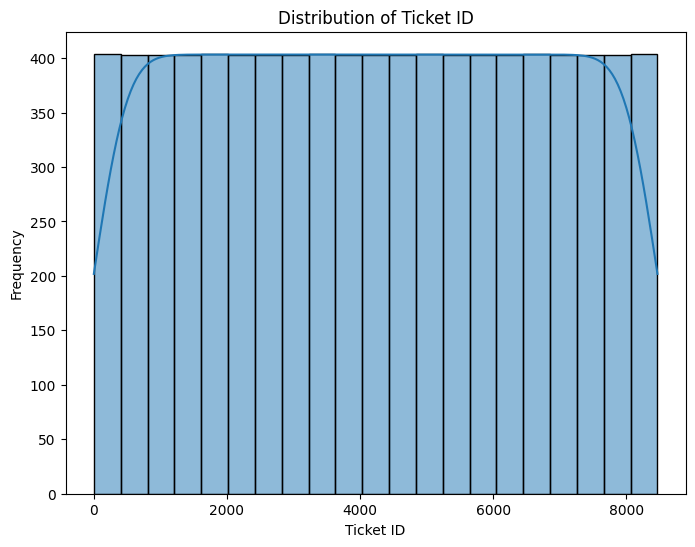

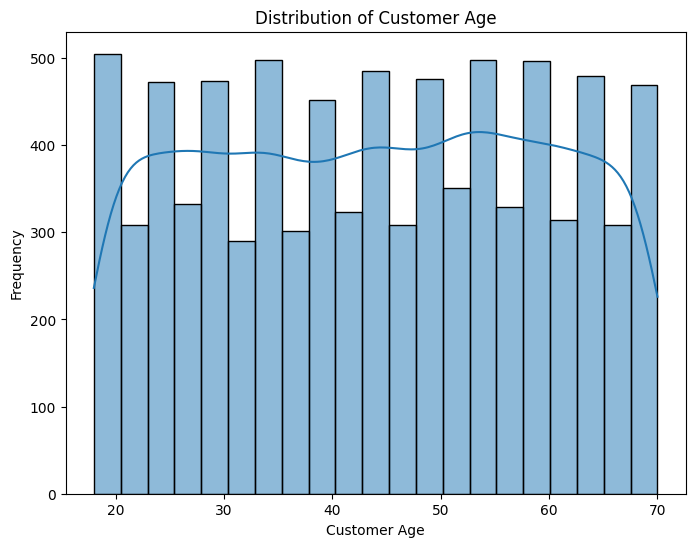

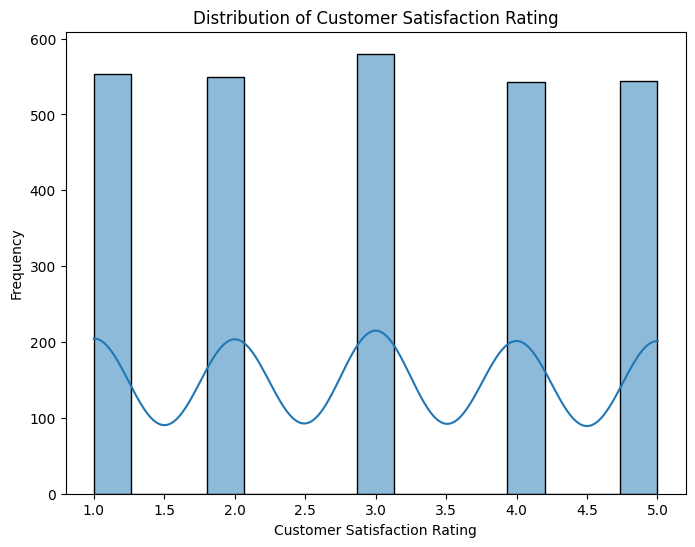

In [ ]:
#Distribution for numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

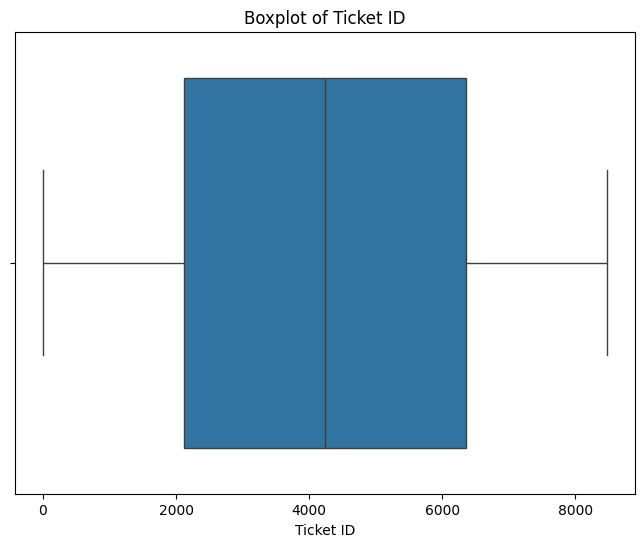

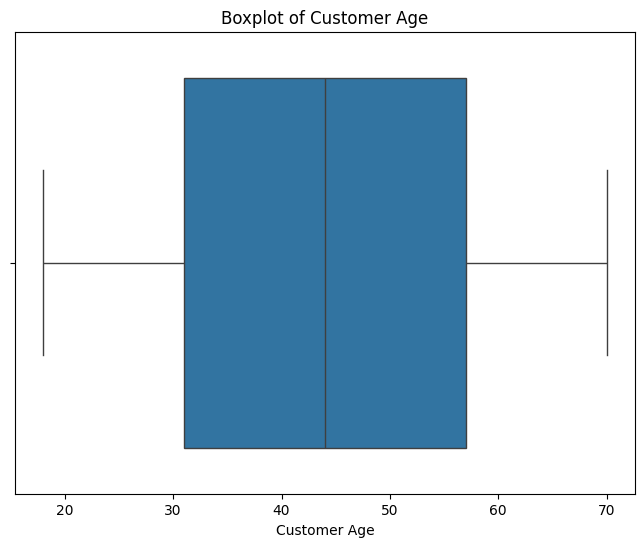

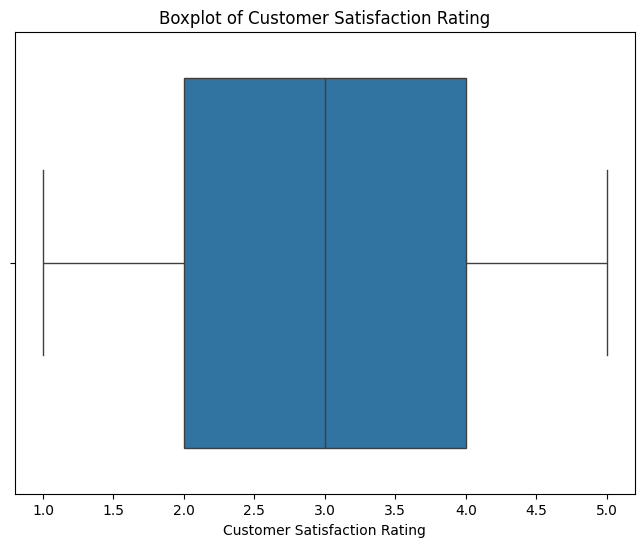

In [ ]:
#Boxplots to identify outliers
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

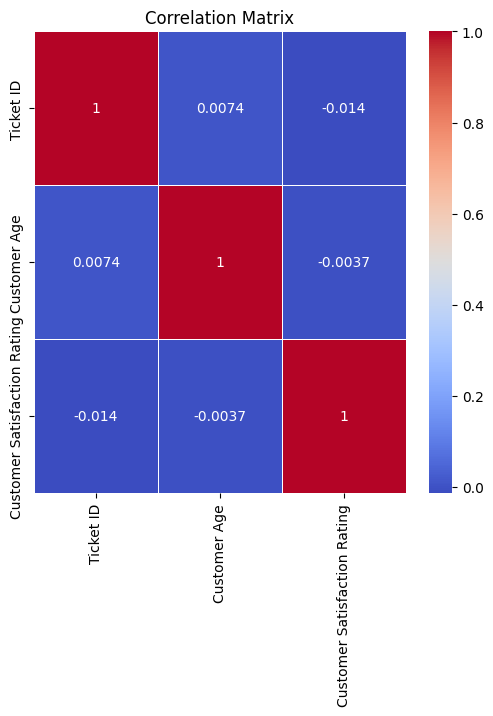

In [ ]:
#Correlation Matrix for numerical features
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **3. Data Preprocessing**

In [ ]:
#drop the less important columns
columns=['Ticket ID','Customer Name','Customer Email','Customer Age','Customer Gender','Date of Purchase','Resolution','Ticket Channel','First Response Time','Time to Resolution'] # Removed leading/trailing spaces from column names
data = data.drop(columns, axis=1)
data.head(2)

,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Customer Satisfaction Rating
0,GoPro Hero,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,NaN
1,LG Smart TV,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,NaN


In [ ]:
#Shhape of the dataset
data.shape

(8469, 7)

In [ ]:
# Replace any non-numeric values with NaN
data['Customer Satisfaction Rating'] = pd.to_numeric(data['Customer Satisfaction Rating'], errors='coerce')

# Fill NaN values with 0
data['Customer Satisfaction Rating'] = data['Customer Satisfaction Rating'].fillna(0)

# Confirm replacement
missing_after_fill = data[['Customer Satisfaction Rating']].isnull().sum()
print(missing_after_fill)

Customer Satisfaction Rating    0
dtype: int64


In [ ]:
index=0
data.loc[index]

,0
Product Purchased,GoPro Hero
Ticket Type,Technical issue
Ticket Subject,Product setup
Ticket Description,I'm having an issue with the {product_purchase...
Ticket Status,Pending Customer Response
Ticket Priority,Critical
Customer Satisfaction Rating,0.0


# **4. Data Cleaning**

In [ ]:
#Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a set of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    text = str(text).lower()  #Convert text to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters and keep spaces
    tokens = text.split() # Split text into individual words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Lemmatize words and remove stop words
    return ' '.join(tokens)  # Join the cleaned tokens back into a string

# Apply the clean_text function
data['cleaned_description'] = data['Ticket Description'].apply(clean_text)


In [ ]:
data.head()

,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Customer Satisfaction Rating,cleaned_description
0,GoPro Hero,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,0.0,im issue productpurchased please assist billin...
1,LG Smart TV,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,0.0,im issue productpurchased please assist need c...
2,Dell XPS,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,3.0,im facing problem productpurchased productpurc...
3,Microsoft Office,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,3.0,im issue productpurchased please assist proble...
4,Autodesk AutoCAD,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,1.0,im issue productpurchased please assist note s...


In [ ]:
# Drop samples with unknown satisfaction rating
data = data[data['Customer Satisfaction Rating'] > 0].copy()

#Re-bin into Positive/Negative
data['Satisfaction_Label'] = pd.cut(data['Customer Satisfaction Rating'],
                                    bins=[0.5, 3, 5],
                                    labels=['Negative', 'Positive'])

In [ ]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(data['Satisfaction_Label'])

# One-hot encode structured features
X_structured = pd.get_dummies(data[['Ticket Priority', 'Ticket Type']], drop_first=True)

In [ ]:
# Clean the text BEFORE sentiment and vectorization
data['cleaned_description'] = data['Ticket Description'].apply(clean_text)

In [ ]:
# Compute VADER sentiment on cleaned text
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['cleaned_description'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
# TF-IDF vectorization (on cleaned text)
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(data['cleaned_description'])


In [ ]:
# Combine all features: text + structured + sentiment
sentiment_sparse = np.array(data['sentiment_score']).reshape(-1, 1)
X_final = hstack([X_text, X_structured.values, sentiment_sparse])

In [ ]:
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
print(X_structured)

      Ticket Priority_High  Ticket Priority_Low  Ticket Priority_Medium  \
2                    False                 True                   False   
3                    False                 True                   False   
4                    False                 True                   False   
10                    True                False                   False   
11                    True                False                   False   
...                    ...                  ...                     ...   
8452                 False                False                   False   
8453                  True                False                   False   
8455                  True                False                   False   
8466                  True                False                   False   
8467                 False                False                    True   

      Ticket Type_Cancellation request  Ticket Type_Product inquiry  \
2                           

In [ ]:
data.shape

(2769, 10)

In [ ]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2,stratify=y, random_state=42)


In [ ]:
#Balance the data imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


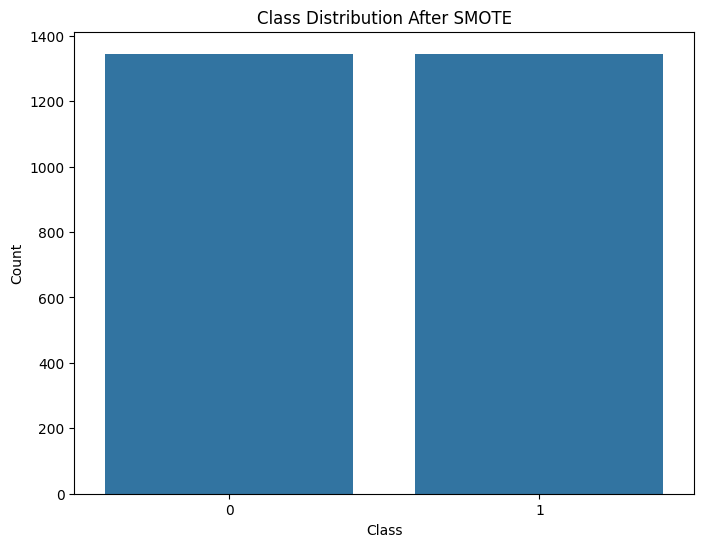

In [ ]:
#plot the graph to show balanced data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_sm)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#Shapes of training and testing data
print('X_train :',X_train_sm.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train_sm.shape)
print('y_test :',y_test.shape)

X_train : (2690, 1008)
X_test : (554, 1008)
y_train : (2690,)
y_test : (554,)


# **5. Model training**

### **5.1 LightGBM Model**

In [ ]:
#Initialize LightGBM model
lgbm = LGBMClassifier(random_state=42)

#  Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15, -1],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


# RandomizedSearchCV with SMOTE-balanced training data
lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',  # better than accuracy in imbalanced cases
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
lgbm_search.fit(X_train_sm, y_train_sm)

#  Evaluate on test data
best_lgbm = lgbm_search.best_estimator_
y_pred = best_lgbm.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17205
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 546
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#Model Evaluations
print("Best Parameters:", lgbm_search.best_params_)
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Best Parameters: {'subsample': 0.7, 'num_leaves': 20, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned LightGBM Accuracy: 0.5379061371841155

Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.66      0.64       337
    Positive       0.40      0.35      0.37       217

    accuracy                           0.54       554
   macro avg       0.50      0.50      0.50       554
weighted avg       0.53      0.54      0.53       554



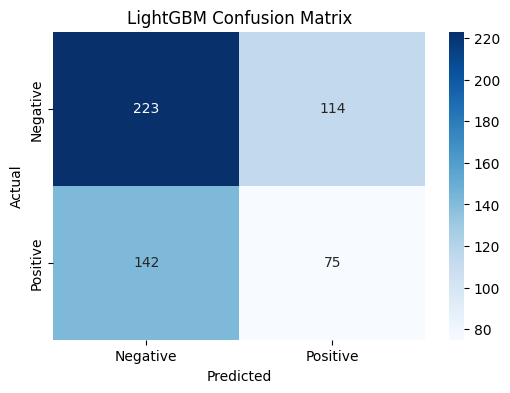

In [ ]:
#  Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix')
plt.show()


### **5.2 Random Forest Model**

In [ ]:

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [20,30, None],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt']
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf,
                                param_distributions=param_grid,
                                n_iter=20,  # number of combinations to try
                                cv=3,       # 3-fold cross-validation
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

# Fit on SMOTE-balanced data
rf_random.fit(X_train_sm, y_train_sm)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Predict and evaluate
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Tuned Random Forest Accuracy: 0.5577617328519856

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67       337
           1       0.41      0.29      0.34       217

    accuracy                           0.56       554
   macro avg       0.51      0.51      0.50       554
weighted avg       0.54      0.56      0.54       554



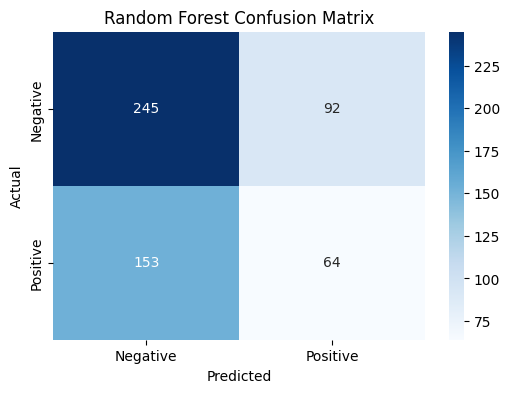

In [ ]:
# Confusion Matrix
y_pred_rf = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# **6. Model Evaluation**

### **6.1 ROC-AUC Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16287
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


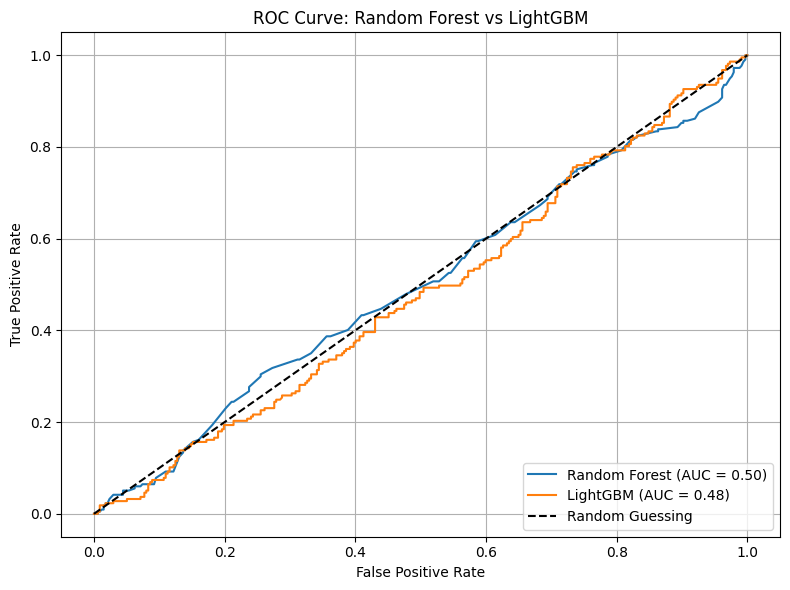

In [ ]:
#Roc-auc curves for model comparison




# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest vs LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()




### **6.2 Precision_Recall Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16287
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


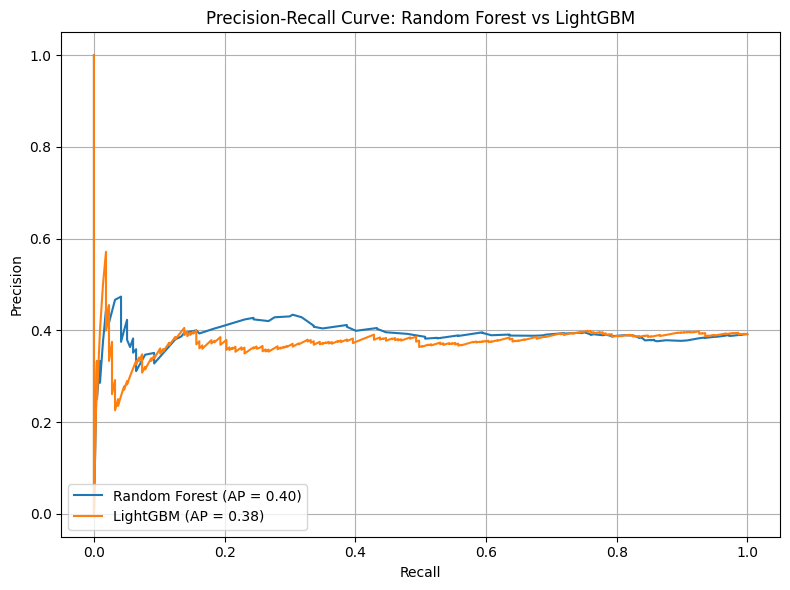

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    avg_precision = average_precision_score(y_test, y_probs)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

# Plot formatting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Random Forest vs LightGBM')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
plt.show()


### **6.3 Overall Model Eavaluationn**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1345, number of negative: 1345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16287
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


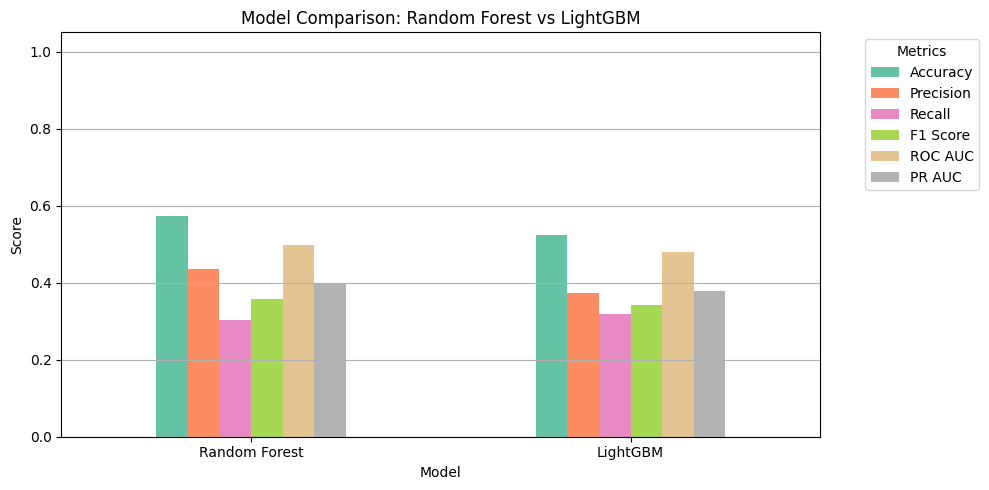

In [ ]:

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


results = []

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_probs),
        'PR AUC': average_precision_score(y_test, y_probs)
    })

# Create DataFrame
comparison_df = pd.DataFrame(results).set_index('Model')

# Plot the graph
ax = comparison_df.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.title('Model Comparison: Random Forest vs LightGBM')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **7. Sentiment Distribution**

In [ ]:
#Define label sentiment function
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'


data['sentiment_label'] = data['sentiment_score'].apply(label_sentiment)


In [ ]:
display(data)

,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Customer Satisfaction Rating,cleaned_description,Satisfaction_Label,sentiment_score,sentiment_label
2,Dell XPS,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,3.0,im facing problem productpurchased productpurc...,Negative,0.1689,Positive
3,Microsoft Office,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,3.0,im issue productpurchased please assist proble...,Negative,0.8885,Positive
4,Autodesk AutoCAD,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,1.0,im issue productpurchased please assist note s...,Negative,0.4404,Positive
10,Nintendo Switch,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,1.0,im issue productpurchased please assist produc...,Negative,0.8316,Positive
11,Microsoft Xbox Controller,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,1.0,im issue productpurchased please assist possib...,Negative,0.8060,Positive
...,...,...,...,...,...,...,...,...,...,...,...
8452,MacBook Pro,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,3.0,im issue productpurchased please assist ive al...,Negative,0.6124,Positive
8453,iPhone,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,5.0,productpurchased unable establish stable inter...,Positive,0.1779,Positive
8455,Dyson Vacuum Cleaner,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,1.0,ive recently set productpurchased fails connec...,Negative,-0.0772,Negative
8466,GoPro Action Camera,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,3.0,im issue productpurchased please assist using ...,Negative,0.4102,Positive


<ipython-input-129-69b08c7adf63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=data, palette='Set2')


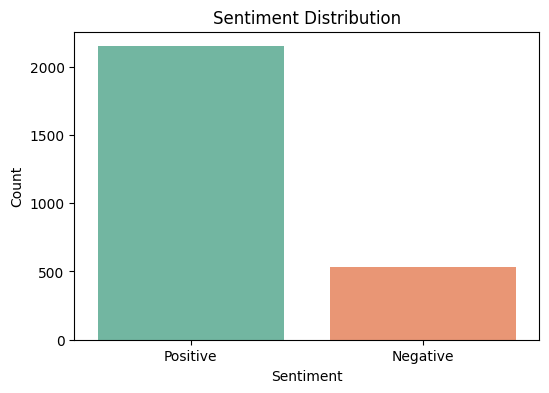

In [ ]:
#Plot for label sentiment
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_label', data=data, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# **8. Keyword Trends**

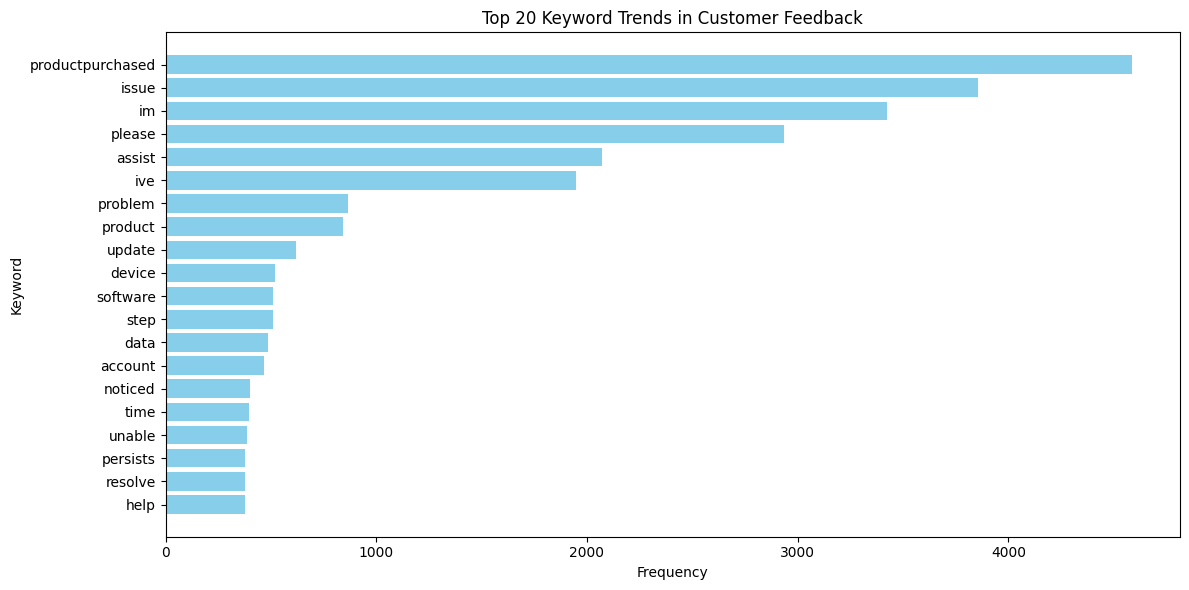

In [ ]:

#  Tokenize cleaned descriptions
all_words = ' '.join(data['cleaned_description']).split()

#  Count word frequencies
word_freq = Counter(all_words)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Keyword', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

#  Plot top 20 keywords
plt.figure(figsize=(12, 6))
plt.barh(word_freq_df['Keyword'], word_freq_df['Frequency'], color='skyblue')
plt.gca().invert_yaxis()  # Highest frequency at top
plt.title('Top 20 Keyword Trends in Customer Feedback')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

### **8.1 Keyword Trends by sentiment**

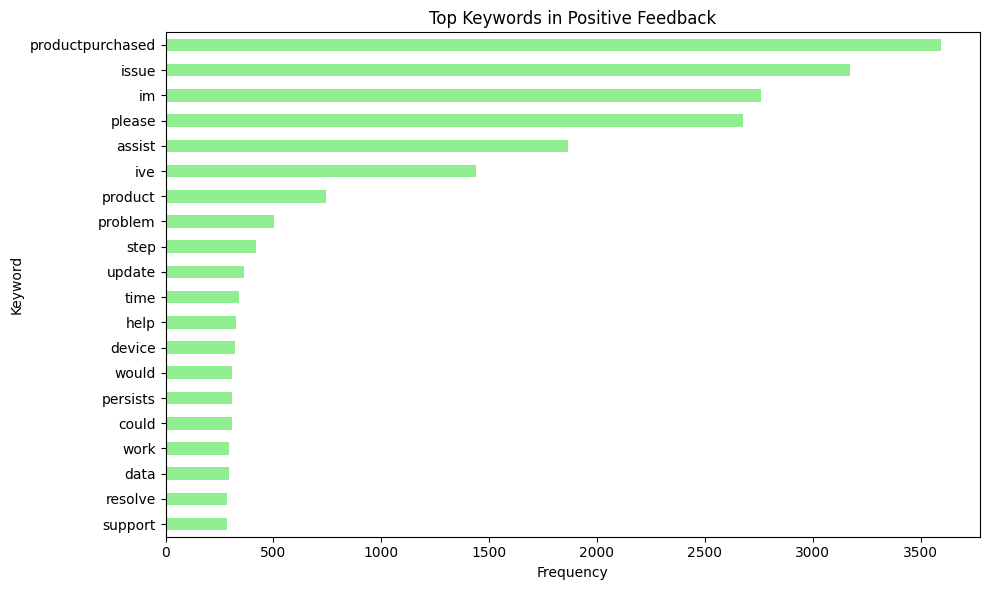

In [ ]:
# Filter for positive feedback only
positive_words = ' '.join(data[data['sentiment_label'] == 'Positive']['cleaned_description']).split()
positive_freq = Counter(positive_words).most_common(20)

# Convert and plot
pd.DataFrame(positive_freq, columns=['Keyword', 'Frequency']).plot.barh(
    x='Keyword', y='Frequency', figsize=(10, 6), color='lightgreen', legend=False)
plt.title('Top Keywords in Positive Feedback')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


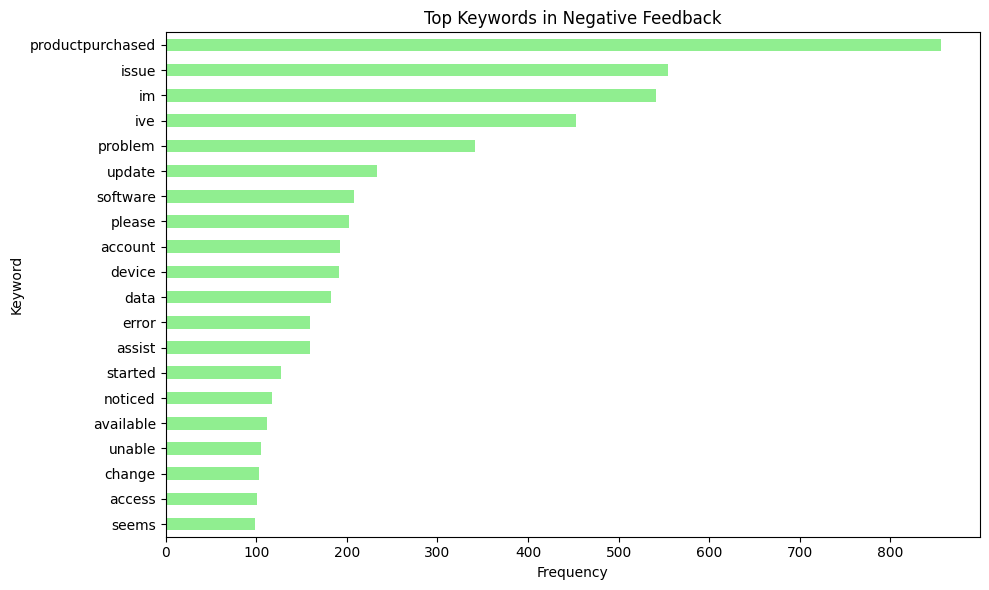

In [ ]:
# Filter for negative feedback only
positive_words = ' '.join(data[data['sentiment_label'] == 'Negative']['cleaned_description']).split()
positive_freq = Counter(positive_words).most_common(20)

# Convert and plot
pd.DataFrame(positive_freq, columns=['Keyword', 'Frequency']).plot.barh(
    x='Keyword', y='Frequency', figsize=(10, 6), color='lightgreen', legend=False)
plt.title('Top Keywords in Negative Feedback')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()


### **8.2 Keyword Trends by Topic**

<ipython-input-133-acc36ab44eb9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')


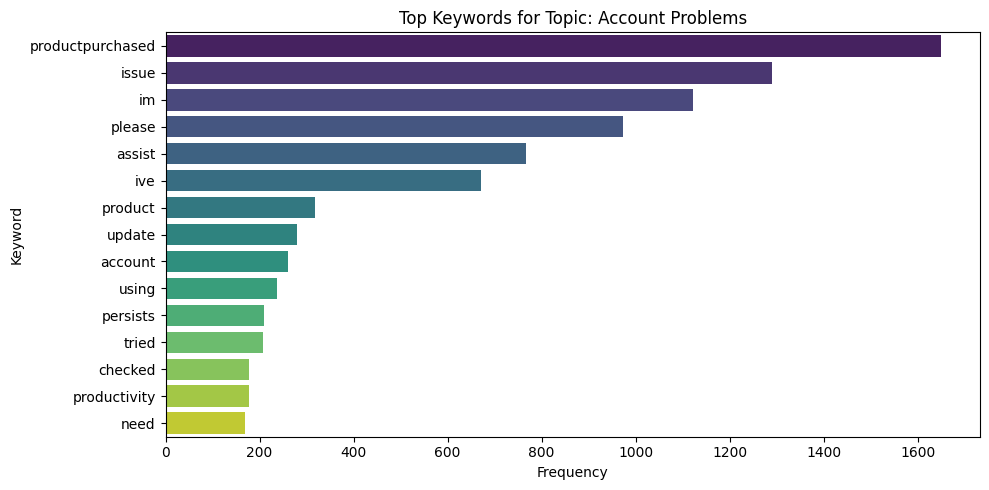

<ipython-input-133-acc36ab44eb9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')


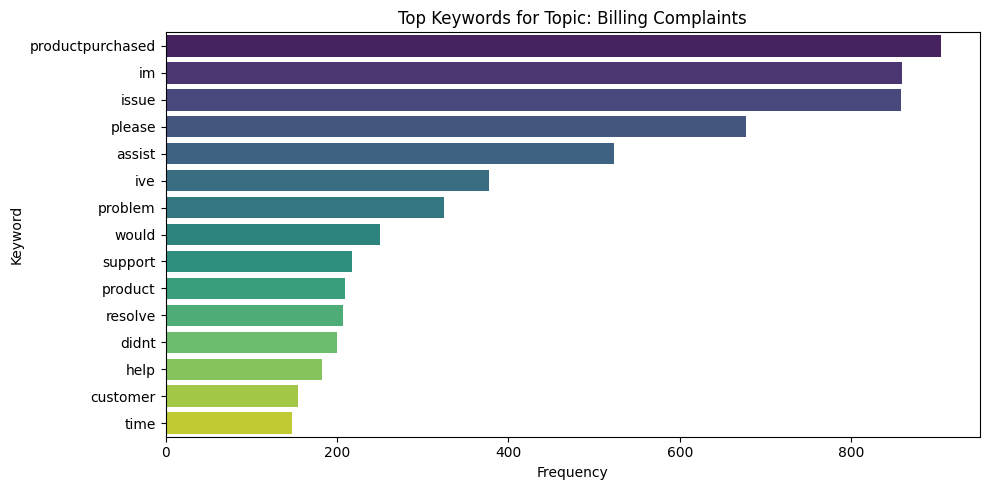

<ipython-input-133-acc36ab44eb9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')


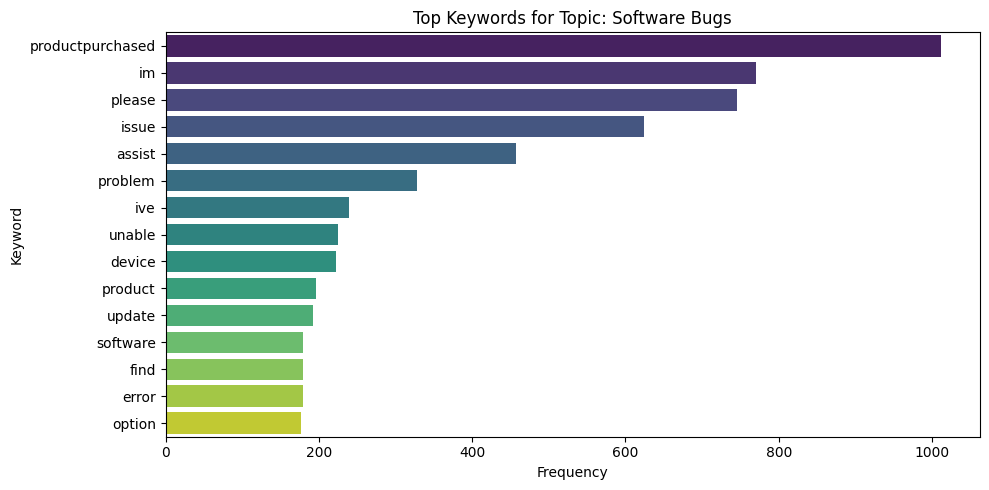

<ipython-input-133-acc36ab44eb9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')


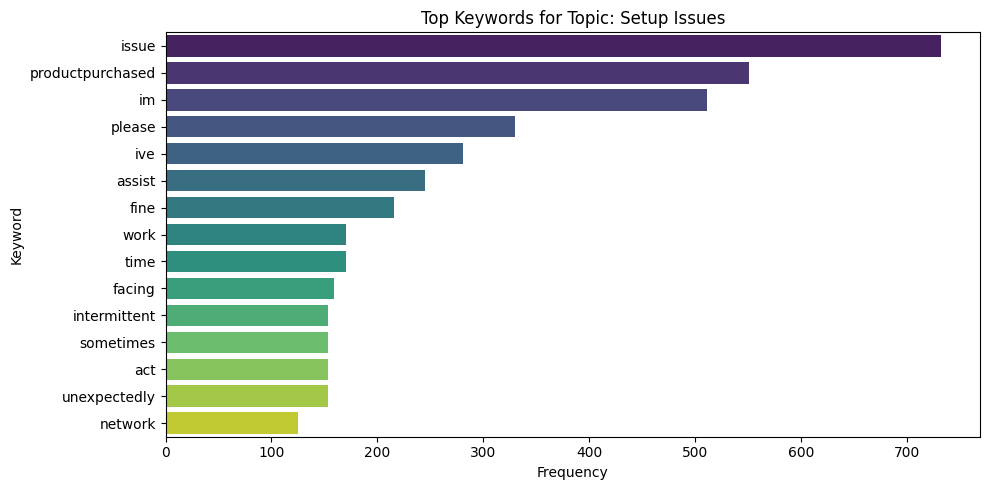

<ipython-input-133-acc36ab44eb9>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')


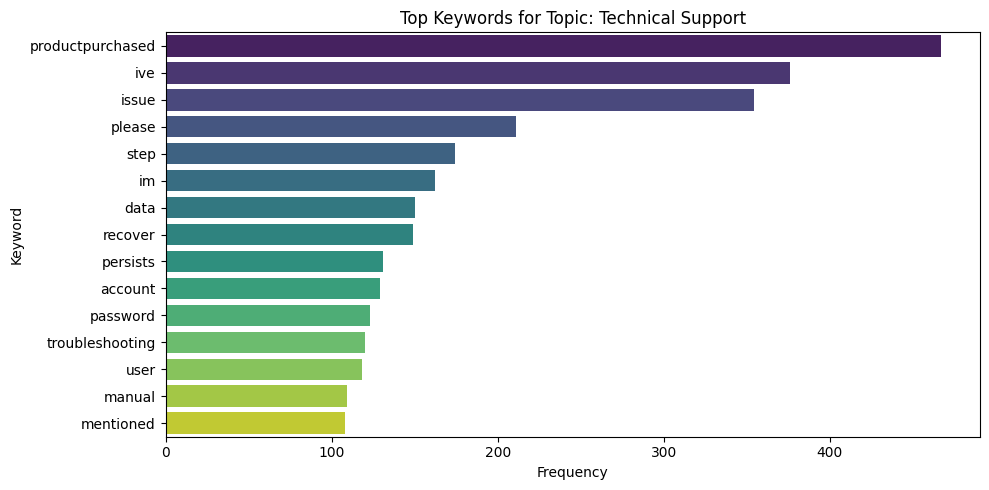

In [ ]:

# Vectorize cleaned descriptions for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['cleaned_description'])

# Apply LDA (retrain or reuse)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Assign dominant topic to each document
topic_values = lda.transform(doc_term_matrix)
data['dominant_topic'] = topic_values.argmax(axis=1)

topic_labels = {
    0: "Setup Issues",
    1: "Account Problems",
    2: "Billing Complaints",
    3: "Technical Support",
    4: "Software Bugs"
}

data['topic_label'] = data['dominant_topic'].map(topic_labels)

# Get topic labels and cleaned text
unique_topics = data['topic_label'].dropna().unique()

# Loop through each topic and plot keyword trends
for topic in unique_topics:
    topic_subset = data[data['topic_label'] == topic]
    all_words = ' '.join(topic_subset['cleaned_description']).split()
    word_freq = Counter(all_words).most_common(15)

    # Create DataFrame for plotting
    df_topic_words = pd.DataFrame(word_freq, columns=['Keyword', 'Frequency'])

    # Plot the graphs
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Keyword', data=df_topic_words, palette='viridis')
    plt.title(f"Top Keywords for Topic: {topic}")
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.tight_layout()
    plt.show()


In [ ]:
#Display the data
display(data)

,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Customer Satisfaction Rating,cleaned_description,Satisfaction_Label,sentiment_score,sentiment_label,dominant_topic,topic_label
2,Dell XPS,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,3.0,im facing problem productpurchased productpurc...,Negative,0.1689,Positive,1,Account Problems
3,Microsoft Office,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,3.0,im issue productpurchased please assist proble...,Negative,0.8885,Positive,2,Billing Complaints
4,Autodesk AutoCAD,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,1.0,im issue productpurchased please assist note s...,Negative,0.4404,Positive,1,Account Problems
10,Nintendo Switch,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,1.0,im issue productpurchased please assist produc...,Negative,0.8316,Positive,1,Account Problems
11,Microsoft Xbox Controller,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,1.0,im issue productpurchased please assist possib...,Negative,0.8060,Positive,2,Billing Complaints
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,MacBook Pro,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,3.0,im issue productpurchased please assist ive al...,Negative,0.6124,Positive,2,Billing Complaints
8453,iPhone,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,5.0,productpurchased unable establish stable inter...,Positive,0.1779,Positive,4,Software Bugs
8455,Dyson Vacuum Cleaner,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,1.0,ive recently set productpurchased fails connec...,Negative,-0.0772,Negative,3,Technical Support
8466,GoPro Action Camera,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,3.0,im issue productpurchased please assist using ...,Negative,0.4102,Positive,2,Billing Complaints


# **9. Insights to Improve Customer Experience**

### 9.1 Issues Identified
*  Setup Issues: Customers face problems during installation or activation.
*  Account Problems: Difficulty with login, password reset, or account access
*  Billing Complaints: Complaints about unexpected charges or refund delays.
*  Technical Support: Frustration with delayed or repeated support interactions.
*  Software Bugs: Reports of application crashes or malfunctioning features.

### 9.2 Sentiment Trends

*   Majority of feedback is Negative, especially for billing and support-related issues.
*  Positive feedback is mainly about successful support or smooth product experiences.

### 9.3 Keyword Trends

*   Frequent negative words: issue, problem, not working, billing, login.
*   Frequent positive words: resolved, helpful, working fine, thank you.

### 9.4 Predictive Modelling Insights

*   Combined features (text, sentiment, structured data) effectively predict customer satisfaction.
*   Random Forest Model outperformed other models where accuracy is 0.56 and it has to be fine tuned further to increase accuaracy.

### 9.5 Operational Improvements

*   Automate responses to common ticket types using AI assistants
*   Enable self-service tools for account and billing issues
*   Monitor topic frequency trends over time to detect and act on rising issues early.

### 9.6 Assumptions

* It is assumed that the numerical ratings provided are accurately reflect customer sentiment and experience
* Ratings missing were either excluded or treated cautiously to avoid misleading model training.
* The topics extracted using LDA are assumed to represent distinct and recurring customer concerns.

### 9.7 Limitations

* Even after using SMOTE, the test set might still be imbalanced, leading to misleading accuracy or low recall for the minority class.
* Some tickets may have vague or very short descriptions, which limits the model's ability to extract value

### 9.8 Next Steps

* Include timestamps, agent performance, product categories, and geographic data for deeper insights.
* Use GridSearchCV and ensemble methods; try deep learning or transformer-based models (e.g., BERT for text).
* Continuously re-train the model on newly arriving data for better long-term accuracy






